<a href="https://colab.research.google.com/github/brex19/PRODIGY_ML_02/blob/main/K_means_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem of statement

### Create a k-means clustering algorithms to group customers of a retail store based on their purchase history.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

load the training data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prodigy/K_means_cluster/Mall_Customers (1).csv")


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Columns name of the dataset
data.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
# checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# plot Spending Score vs CustomerID

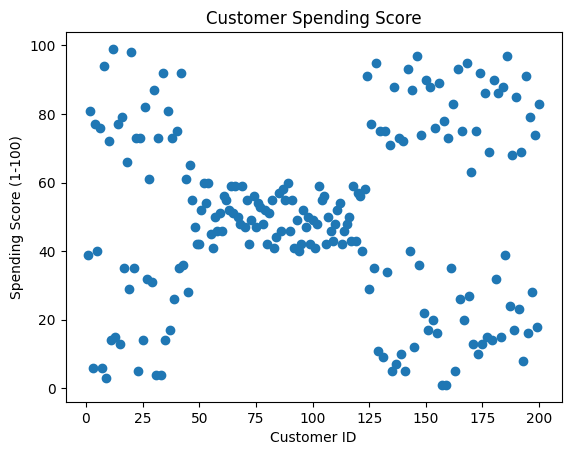

In [ ]:
plt.scatter(data['CustomerID'], data['Spending Score (1-100)'])
plt.xlabel('Customer ID')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Spending Score')
plt.show()

In [ ]:
#From the above graph let assume km=5
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

# Scaling the Data

In [ ]:
scaler=MinMaxScaler()
scaler.fit(data[['Spending Score (1-100)']])
data['Spending Score (1-100)']=scaler.transform(data['Spending Score (1-100)'].values.reshape(-1, 1))
scaler=MinMaxScaler()
scaler.fit(data[['CustomerID']])
data['CustomerID']=scaler.transform(data['CustomerID'].values.reshape(-1, 1))
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,Male,19,15,0.387755
1,0.005025,Male,21,15,0.816327
2,0.010050,Female,20,16,0.051020
3,0.015075,Female,23,16,0.775510
4,0.020101,Female,31,17,0.397959
...,...,...,...,...,...
195,0.979899,Female,35,120,0.795918
196,0.984925,Female,45,126,0.275510
197,0.989950,Male,32,126,0.744898
198,0.994975,Male,32,137,0.173469


In [ ]:
y_predicted=km.fit_predict(data[['CustomerID','Spending Score (1-100)']])
y_predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
# display the position of the centroid
km.cluster_centers_

array([[0.11557789, 0.79148181],
       [0.80904523, 0.17991407],
       [0.42211055, 0.49880732],
       [0.80904523, 0.82783883],
       [0.11055276, 0.20319432]])

# plotting Clusters

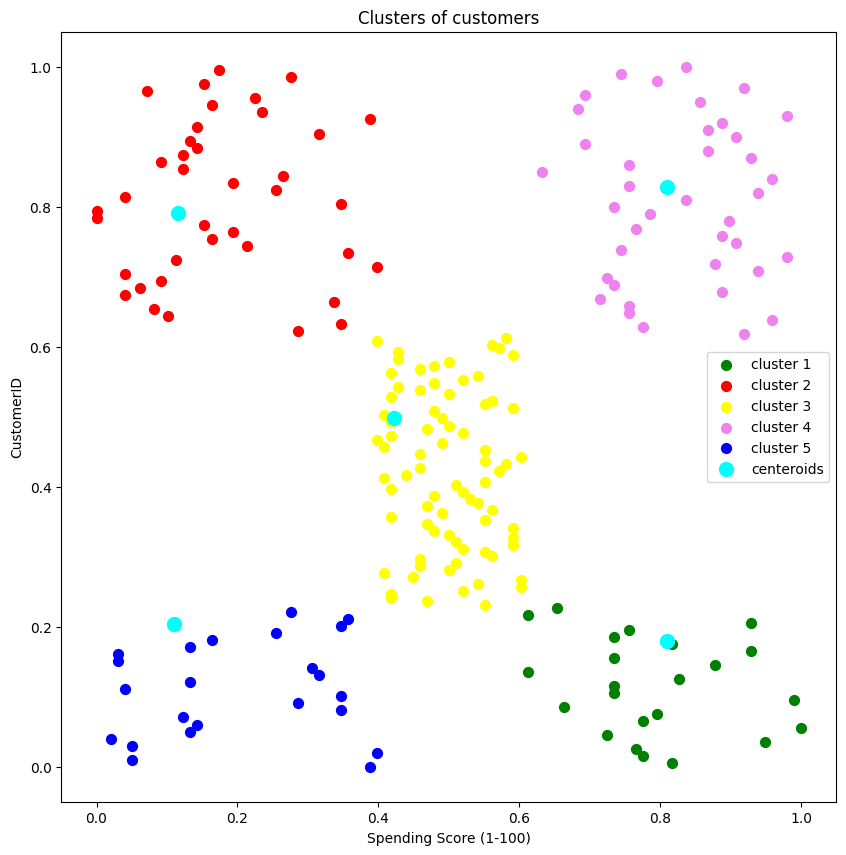

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['Spending Score (1-100)'][y_predicted==0],data['CustomerID'][y_predicted==0],s=50,c='green',label='cluster 1')
plt.scatter(data['Spending Score (1-100)'][y_predicted==1],data['CustomerID'][y_predicted==1],s=50,c='red',label='cluster 2')
plt.scatter(data['Spending Score (1-100)'][y_predicted==2],data['CustomerID'][y_predicted==2],s=50,c='yellow',label='cluster 3')
plt.scatter(data['Spending Score (1-100)'][y_predicted==3],data['CustomerID'][y_predicted==3],s=50,c='violet',label='cluster 4')
plt.scatter(data['Spending Score (1-100)'][y_predicted==4],data['CustomerID'][y_predicted==4],s=50,c='blue',label='cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='cyan',label='centeroids')
plt.title('Clusters of customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('CustomerID')
plt.legend()
plt.show()

# Clustering Evaluation Score

In [ ]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['CustomerID','Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

# Elbow plot

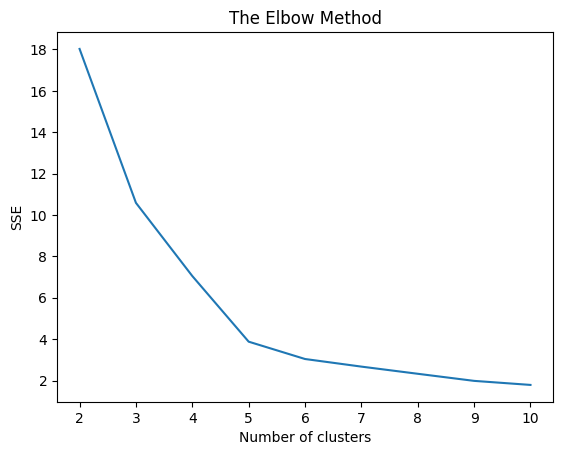

In [ ]:
plt.plot(range(2, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the above plot using elbow method the k value is 5.so our assumption and the recommended k value are the same.Therefore I can cluster customers of retail stores based on purchase history(Spending Score(1-100)) into 5 .